In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf
from tensorflow.keras import utils

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [59]:
# 데이터 불러오기
import csv
f = open('data_all_0805_sentiment.csv', 'r', encoding='utf-8')
lines = csv.reader(f)
header = next(lines)
print(header)
f.close()

review = pd.read_csv('data_all_0805_sentiment.csv', encoding='utf-8')
review.head()

['브랜드', '평점', '피부타입', '피부 고민', '자극도', '리뷰', 'sentiment']


,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
0,닥터지,4,복합성에 좋아요,진정에 좋아요,보통이에요,컵 받고싶어서 샀어요 크림은 튜브형태러 내줄 생각은 없는건지 궁금해요,1
1,닥터지,5,건성에 좋아요,진정에 좋아요,자극없이 순해요,닥터지는 사계절 내내 잘 사용하고잇어요 물론 건성피부에게 겨울에는 얼굴당김잇어서...,1
2,닥터지,5,복합성에 좋아요,진정에 좋아요,보통이에요,아빠 사드렸는데 좋아해요 근데 바르는게 쫌 별로긴 한데 투브타입으로 나오면 더 좋을 듯,1
3,닥터지,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,국민 수분 크림이라 그런지 모든 피부타입에도 잘 맞으면서 무난한 아이템이에요 당황이...,1
4,닥터지,4,복합성에 좋아요,보습에 좋아요,자극없이 순해요,여름용 수분크림이 필요해서 산 제품이에요 가격은 세일가로 8800원 했어요사실 ...,1


In [60]:
review.tail()

,브랜드,평점,피부타입,피부 고민,자극도,리뷰,sentiment
6842,에스트라,1,건성에 좋아요,보습에 좋아요,자극없이 순해요,재구매했어요 건성한테 진심 추천 가격올리면 가만안둬,0
6843,에스트라,2,건성에 좋아요,보습에 좋아요,보통이에요,복합성인데 겨울에 건조한 피부입니다 모공막은 성분때문에 뭐가 나는것같습니다 건성이신...,0
6844,에스트라,2,복합성에 좋아요,보습에 좋아요,보통이에요,기름기가 없어서 좋네요 보습은 시간지나면 좀 당깁니다,0
6845,에스트라,2,건성에 좋아요,보습에 좋아요,자극이 느껴져요,5통넘게쓱있는데 정말무난하게쓰여용 자극없이 순해요,0
6846,에스트라,2,건성에 좋아요,보습에 좋아요,보통이에요,모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요,0


In [61]:
texts = review['리뷰'].values
labels = review['sentiment'].values

In [62]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.3, random_state=731)

In [64]:
max_words = 10000  # 사용할 최대 단어 수
max_len = 100  # 각 시퀀스의 최대 길이

In [65]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [66]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'잘': 1, '너무': 2, '좋아요': 3, '같아요': 4, '것': 5, '더': 6, '피부가': 7, '피부': 8, '바르고': 9, '이': 10, '좋은': 11, '피부에': 12, '많이': 13, '다': 14, '수': 15, '저는': 16, '좋고': 17, '진짜': 18, '쓰고': 19, '있어요': 20, '크림': 21, '좀': 22, '정말': 23, '꾸준히': 24, '안': 25, '촉촉하고': 26, '바로': 27, '이거': 28, '바르면': 29, '여름에': 30, '순하고': 31, '때': 32, '않고': 33, '있어서': 34, '좋아서': 35, '없이': 36, '있는': 37, '제품': 38, '사용하고': 39, '엄청': 40, '닥터지': 41, '느낌이': 42, '얼굴에': 43, '수분': 44, '구매했어요': 45, '좋네요': 46, '거': 47, '딱': 48, '좋습니다': 49, '또': 50, '다른': 51, '아주': 52, '없고': 53, '계속': 54, '사용하기': 55, '제품은': 56, '조금': 57, '제': 58, '같이': 59, '에스트라': 60, '않아서': 61, '그냥': 62, '얼굴': 63, '제가': 64, '이번에': 65, '쓰기': 66, '그리고': 67, '사용': 68, '발라도': 69, '해서': 70, '크림을': 71, '있습니다': 72, '요즘': 73, '한': 74, '완전': 75, '있는데': 76, '근데': 77, '항상': 78, '앰플': 79, '일단': 80, '크림은': 81, '수분크림': 82, '전': 83, '자극없이': 84, '넘': 85, '확실히': 86, '그래서': 87, '아이크림': 88, '흡수도': 89, '흡수가': 90, '제품을': 91, '없어서': 92, '마녀공장': 93, '미스트': 94, '아비브': 95, '좋았어요': 96, '리뉴얼': 

In [67]:
vocab_size = len(word_to_index) + 1
print('전체 단어 집합의 크기 : ', vocab_size)

전체 단어 집합의 크기 :  29545


In [68]:
# 패딩 처리
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.3):  # Dropout 비율 조정
        super(TransformerEncoder, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.01)),  # L2 정규화 추가
             Dense(embed_dim, kernel_regularizer=l2(0.01))]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [70]:
def build_model(max_len, max_words):
    embed_dim = 128  
    num_heads = 4
    ff_dim = 128 

    inputs = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=max_words, output_dim=embed_dim, input_length=max_len)(inputs)
    transformer_block = TransformerEncoder(embed_dim, num_heads, ff_dim)(embedding_layer)
    x = GlobalAveragePooling1D()(transformer_block)
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    x = Dense(20, activation="relu", kernel_regularizer=l2(0.01))(x)  # L2 정규화 추가
    x = Dropout(0.3)(x)  # Dropout 비율 조정
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 transformer_encoder_2 (Tran  (None, 100, 128)         297344    
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 20)                2580

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [72]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [73]:
history_transformer = model_transformer.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2, callbacks=[es, lr_scheduler])

Epoch 1/3
120/120 [==============================] - 20s 159ms/step - loss: 2.0038 - accuracy: 0.8367 - val_loss: 1.0931 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 2/3
120/120 [==============================] - 18s 149ms/step - loss: 0.6474 - accuracy: 0.8949 - val_loss: 0.3988 - val_accuracy: 0.9312 - lr: 0.0010
Epoch 3/3
120/120 [==============================] - 18s 149ms/step - loss: 0.2209 - accuracy: 0.9763 - val_loss: 0.2642 - val_accuracy: 0.9437 - lr: 0.0010


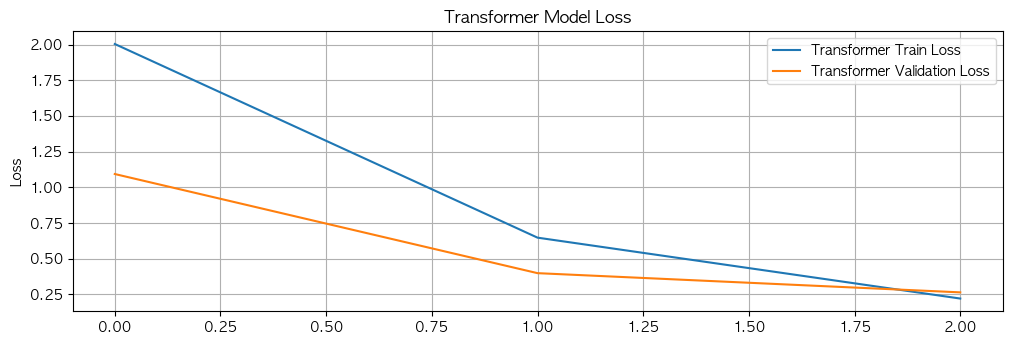

In [74]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

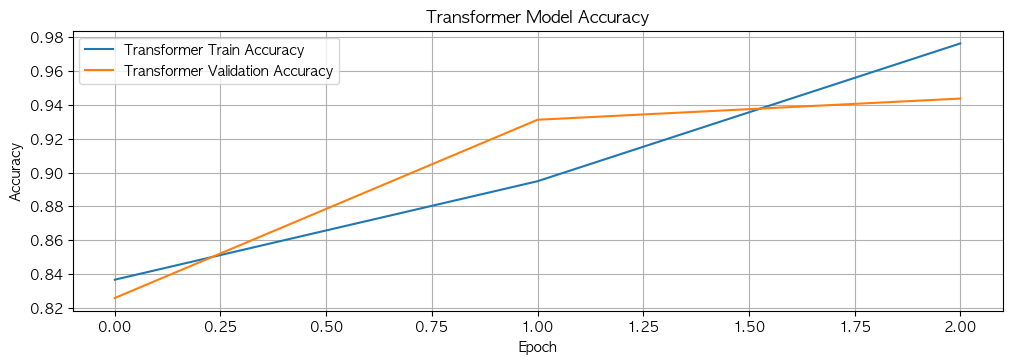

In [75]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Validation Accuracy')
plt.title('Transformer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# 리뷰 예측 함수
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "이 제품은 정말 좋았어요! 강력 추천합니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 174ms/step
리뷰: 이 제품은 정말 좋았어요! 강력 추천합니다.
예측된 감정: 긍정
예측 확률: 0.9860


In [77]:
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다.
예측된 감정: 부정
예측 확률: 0.5137


In [78]:
# 재구매했어요 건성한테 진심 추천 가격올리면 가만안둬
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "재구매했어요 건성한테 진심 추천 가격올리면 가만안둬"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 재구매했어요 건성한테 진심 추천 가격올리면 가만안둬
예측된 감정: 부정
예측 확률: 0.8127


In [79]:
# 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
예측된 감정: 부정
예측 확률: 0.9249


In [80]:
# 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.3 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 모공막힘 성분 덕에 왕여드름 터져요 몸에바르니 좋은데 몸에바르기엔 비싸요
예측된 감정: 부정
예측 확률: 0.9249


In [81]:
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "엄청 극적인 효과까지는 모르겠어요"

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 엄청 극적인 효과까지는 모르겠어요
예측된 감정: 부정
예측 확률: 0.9641


In [82]:
# 부정적인 리뷰 예측 예제
negative_review = "이 제품은 별로였어요. 다시는 사고 싶지 않아요."

# 예측
predict_sentiment(negative_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 13ms/step
리뷰: 이 제품은 별로였어요. 다시는 사고 싶지 않아요.
예측된 감정: 부정
예측 확률: 0.9820


In [84]:
# 부정적인 리뷰 예측 예제
negative_review = "최고 짱 "

# 예측
predict_sentiment(negative_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 14ms/step
리뷰: 최고 짱 
예측된 감정: 긍정
예측 확률: 0.9975


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import wordnet
import random

In [19]:
# 무작위 삽입
def get_synonyms(word): # 주어진 단어의 동의어를 WordNet을 사용하여 찾아 리스트로 반환
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def random_insertion(words, n): # 입력된 단어 목록에서 n개의 단어를 무작위로 삽입
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words): # 주어진 단어 목록에서 무작위로 단어를 선택하여 그 동의어를 새로운 위치에 삽입
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

In [20]:
# 단어 순서 변경
def random_swap(words, n): # 입력된 단어 목록에서 n번의 단어 순서 변경을 수행
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words): # 주어진 단어 목록에서 두 개의 단어를 무작위로 선택하여 그 위치를 서로 바꿈
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

In [21]:
def augment_sentence(sentence): # 주어진 문장을 무작위 삽입과 단어 순서 변경 기법을 사용하여 증강
    words = sentence.split(' ')
    words = [word for word in words if word != '']
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = 2

    augmented_sentences.append(' '.join(random_insertion(words, int(0.1*num_words))))
    augmented_sentences.append(' '.join(random_swap(words, int(0.1*num_words))))

    return augmented_sentences

augmented_texts = []
augmented_labels = []

for text, label in zip(X_train, y_train):
    augmented_sentences = augment_sentence(text)
    augmented_texts.extend(augmented_sentences)
    augmented_labels.extend([label]*len(augmented_sentences))

# 데이터 합치기
X_train_augmented = list(X_train) + augmented_texts
y_train_augmented = list(y_train) + augmented_labels

# 텍스트 토큰화 및 시퀀스 변환
tokenizer.fit_on_texts(X_train_augmented)

X_train_seq_augmented = tokenizer.texts_to_sequences(X_train_augmented)
X_train_pad_augmented = pad_sequences(X_train_seq_augmented, maxlen=max_len)

# NumPy 배열로 변환
X_train_pad_augmented = np.array(X_train_pad_augmented)
y_train_augmented = np.array(y_train_augmented)

In [22]:
model_transformer = build_model(max_len, max_words)
model_transformer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 transformer_encoder_1 (Tran  (None, 100, 128)         297344    
 sformerEncoder)                                                 
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 20)                2580

In [23]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

In [24]:
history_transformer = model_transformer.fit(X_train_pad_augmented, y_train_augmented, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es, lr_scheduler])

Epoch 1/10
360/360 [==============================] - 94s 258ms/step - loss: 0.8642 - accuracy: 0.9067 - val_loss: 0.1714 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 2/10
360/360 [==============================] - 98s 272ms/step - loss: 0.0733 - accuracy: 0.9887 - val_loss: 0.0642 - val_accuracy: 0.9861 - lr: 0.0010
Epoch 3/10
360/360 [==============================] - 88s 244ms/step - loss: 0.0326 - accuracy: 0.9958 - val_loss: 0.0334 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 4/10
360/360 [==============================] - 91s 252ms/step - loss: 0.0217 - accuracy: 0.9960 - val_loss: 0.0320 - val_accuracy: 0.9924 - lr: 9.0484e-04
Epoch 5/10
360/360 [==============================] - 103s 287ms/step - loss: 0.0158 - accuracy: 0.9974 - val_loss: 0.0157 - val_accuracy: 0.9972 - lr: 8.1873e-04
Epoch 6/10
360/360 [==============================] - 96s 265ms/step - loss: 0.0119 - accuracy: 0.9974 - val_loss: 0.0141 - val_accuracy: 0.9986 - lr: 7.4082e-04
Epoch 7/10
360/360 [===================

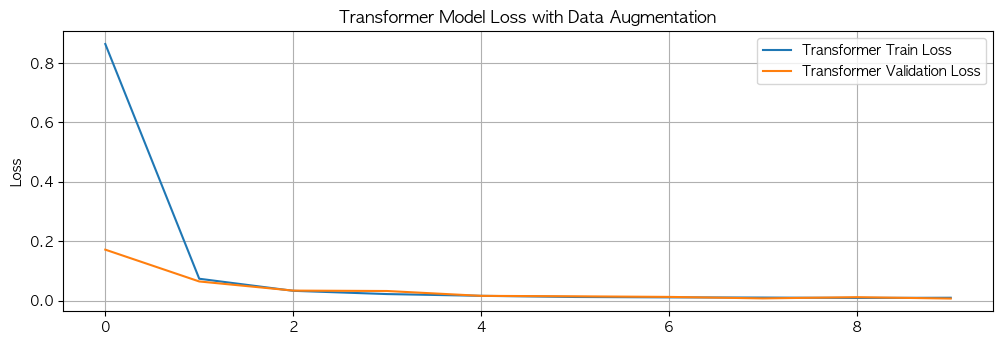

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Transformer 학습 및 검증 손실 곡선
plt.subplot(2, 1, 1)
plt.plot(history_transformer.history['loss'], label='Transformer Train Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Transformer Model Loss with Data Augmentation')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

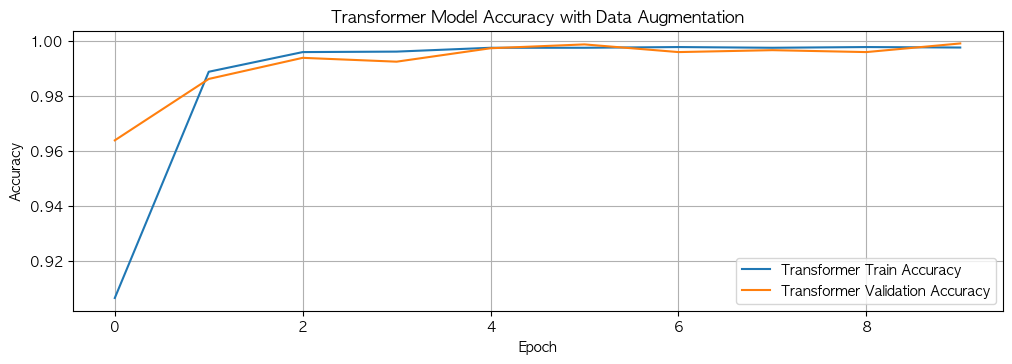

In [26]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(history_transformer.history['accuracy'], label='Transformer Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Transformer Validation Accuracy')
plt.title('Transformer Model Accuracy with Data Augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# 리뷰 예측 함수
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "이 제품은 정말 좋았어요! 강력 추천합니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 15ms/step
리뷰: 이 제품은 정말 좋았어요! 강력 추천합니다.
예측된 감정: 긍정
예측 확률: 0.9479


In [46]:
def predict_sentiment(review_text, model, tokenizer, max_len):
    review_seq = tokenizer.texts_to_sequences([review_text]) 
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    
    prediction = model.predict(review_pad)
    
    sentiment = "긍정" if prediction >= 0.5 else "부정"
    confidence = prediction[0][0] if sentiment == "긍정" else 1 - prediction[0][0]
    
    print(f"리뷰: {review_text}")
    print(f"예측된 감정: {sentiment}")
    print(f"예측 확률: {confidence:.4f}")

sample_review = "지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다."

predict_sentiment(sample_review, model_transformer, tokenizer, max_len)

1/1 [==============================] - 0s 14ms/step
리뷰: 지성이고 써봤는데 여드름이 너무 많이 났어요. 재구매 의사 없습니다.
예측된 감정: 긍정
예측 확률: 0.9781
